In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [132]:
df = pd.read_csv('data/train.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [133]:
df.shape

(45593, 20)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [135]:
df.rename(columns={"Weatherconditions":"Weather_conditions"},inplace=True)

### observatio
- Few of the column are of different data type [Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Time_taken(min)]
- need to remove the (min) from "Time_taken(min)" Feature and conver it into numeric data type 
- city_code name can be extracted through "Delivery_person_ID"
- There are "NaN" values in the dataset but it's in the string format so need to be converted into np.nan to remove them 
- ID & Delivery_person_ID will not be used to build the model. 

> Feature Extraction can be done in:
- order_date
- Time_order
- Time_order_picked
- Restaurant_latitude,Restaurant_longitude
- Delivery_location_latitude ,Delivery_location_longitude

In [136]:
df.duplicated().sum()

np.int64(0)

In [137]:
df.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [138]:
df = df.replace(["nan","NaN","None",""],np.nan,regex=True)

In [139]:
df.isnull().sum()/df.shape[0]*100

ID                             0.000000
Delivery_person_ID             0.000000
Delivery_person_Age            4.066414
Delivery_person_Ratings        4.184853
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    3.796635
Time_Order_picked              0.000000
Weather_conditions             1.351085
Road_traffic_density           1.318185
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            2.177966
Festival                       0.500077
City                           2.631983
Time_taken(min)                0.000000
dtype: float64

In [140]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")

In [141]:
df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))

## univariant 

#### Delivery_person_Age 
- It is normally distributed 
- No outliers

<Axes: xlabel='Delivery_person_Age', ylabel='Density'>

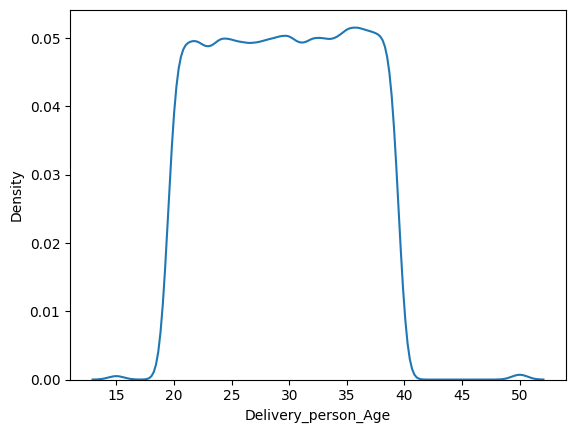

In [142]:
sns.kdeplot(df['Delivery_person_Age'])

<Axes: ylabel='Delivery_person_Age'>

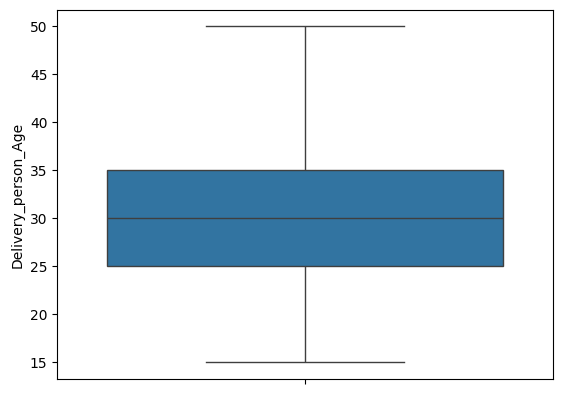

In [143]:
sns.boxplot(df['Delivery_person_Age'])

In [144]:
df['Delivery_person_Age'].describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

#### Delivery_person_Ratings
- left skewd
- have null values
- contain outliers

<Axes: xlabel='Delivery_person_Ratings', ylabel='Density'>

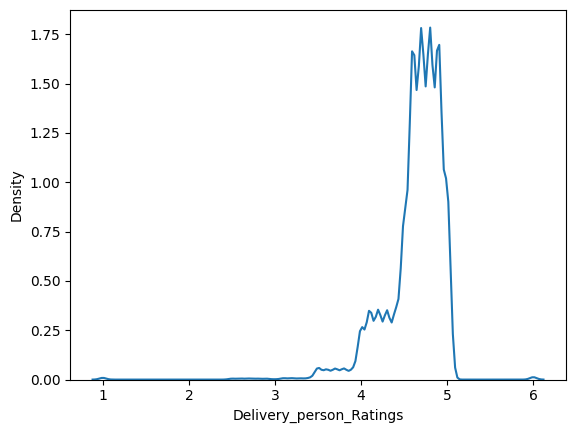

In [145]:
sns.kdeplot(df['Delivery_person_Ratings'])

<Axes: ylabel='Delivery_person_Ratings'>

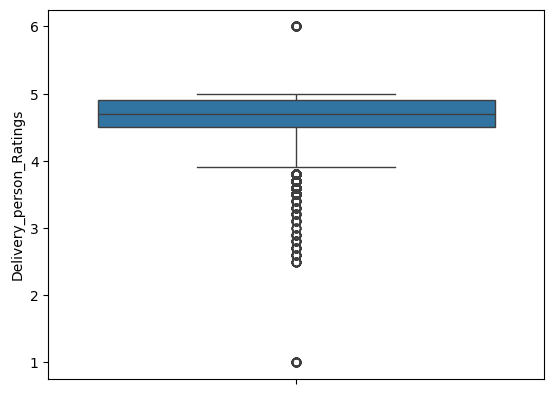

In [146]:
sns.boxplot(df['Delivery_person_Ratings'])

In [147]:
df['Delivery_person_Ratings'].skew()

np.float64(-2.4935515971807916)

#### Type_of_order

<Axes: ylabel='Type_of_order'>

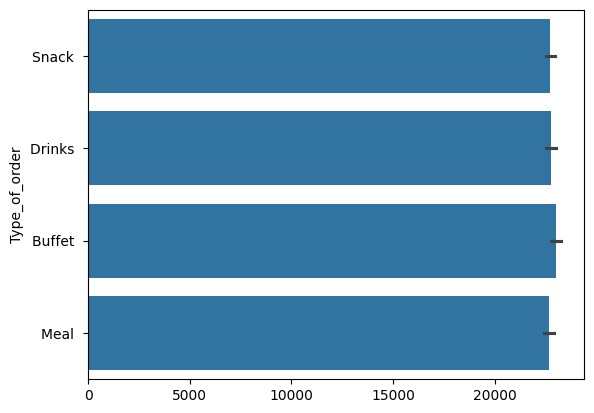

In [148]:
sns.barplot(df['Type_of_order'])

In [149]:
df['Type_of_order'].value_counts()

Type_of_order
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: count, dtype: int64

#### City

<Axes: ylabel='City'>

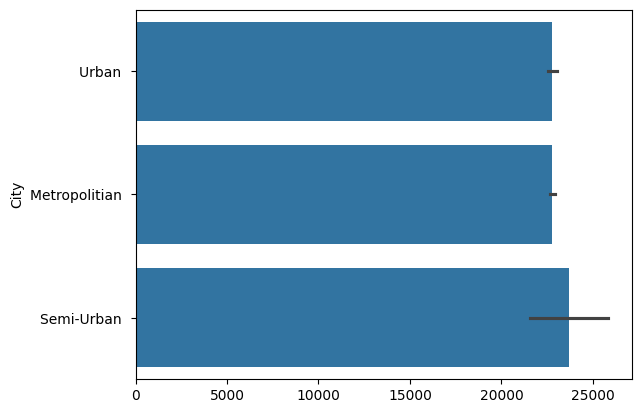

In [150]:
sns.barplot(df['City'])

<Axes: ylabel='count'>

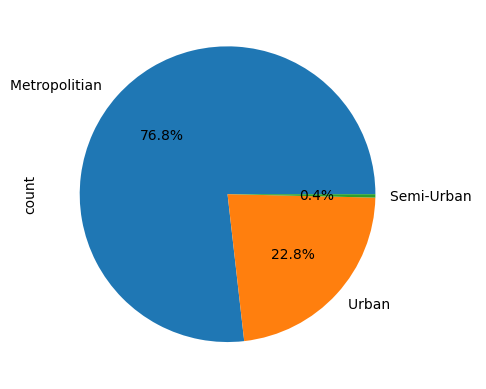

In [151]:
df['City'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [152]:
df['City'].value_counts()

City
Metropolitian     34093
Urban             10136
Semi-Urban          164
Name: count, dtype: int64

## Bivariant Analysis


#### Delivery_person_Age - Time_taken(min)

- weak correlation

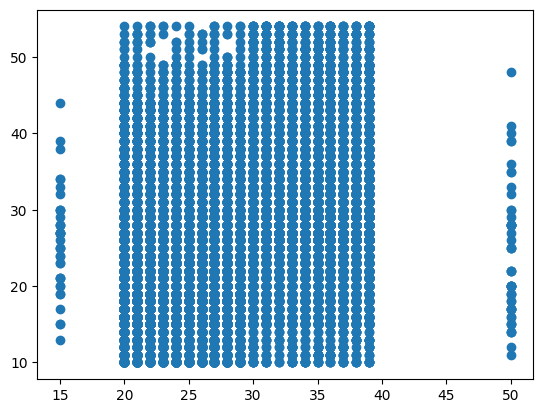

In [153]:
plt.scatter(df['Delivery_person_Age'],df['Time_taken(min)'])

In [154]:
df['Delivery_person_Age'].corr(df['Time_taken(min)'])

np.float64(0.2994736826810402)

## Filling nan values

In [155]:
df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']), inplace=True)
df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']), inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)

In [156]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30


In [157]:
df['Road_traffic_density'] = df['Road_traffic_density'].str.strip()

In [158]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: count, dtype: int64

## Feature Extraction


In [159]:
df["City_code"]=df['Delivery_person_ID'].apply(lambda X:X.split("RES")[0])
df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())

In [160]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].str.strip()
df['Festival'] = df['Festival'].str.strip()
df['City'] = df['City'].str.strip()

In [161]:
'Type_of_vehicle', 'Festival', 'City'

('Type_of_vehicle', 'Festival', 'City')

#### Feature Extraction on order_date col

In [162]:
df["day"] = df.Order_Date.dt.day
df["month"] = df.Order_Date.dt.month
df["quarter"] = df.Order_Date.dt.quarter
df["year"] = df.Order_Date.dt.year
df['day_of_week'] = df.Order_Date.dt.day_of_week.astype(int)
df["is_month_start"] = df.Order_Date.dt.is_month_start.astype(int)
df["is_month_end"] = df.Order_Date.dt.is_month_end.astype(int)
df["is_quarter_start"] = df.Order_Date.dt.is_quarter_start.astype(int)
df["is_quarter_end"] = df.Order_Date.dt.is_quarter_end.astype(int)
df["is_year_start"] = df.Order_Date.dt.is_year_start.astype(int)
df["is_year_end"] = df.Order_Date.dt.is_year_end.astype(int)
df['is_weekend'] = np.where(df['day_of_week'].isin([5,6]),1,0)


#### Time_orderd and Time_order_picked

In [114]:
df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])

In [115]:
df['Time_Orderd']

0       0 days 11:30:00
1       0 days 19:45:00
2       0 days 08:30:00
3       0 days 18:00:00
4       0 days 13:30:00
              ...      
45588   0 days 11:35:00
45589   0 days 19:55:00
45590   0 days 23:50:00
45591   0 days 13:35:00
45592   0 days 17:10:00
Name: Time_Orderd, Length: 45593, dtype: timedelta64[ns]

##### problem
- In some places Time_order_picked is less than Time_order which mean that the order is picked in next day

> solution: can make a new col with the date and time for Time_order and Time_order_picked

In [116]:
df['Time_Order_picked_formatted'] = df['Order_Date'] + np.where(df['Time_Order_picked'] < df['Time_Orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df['Time_Order_picked']
df['Time_Order_picked_formatted']=pd.to_datetime(df['Time_Order_picked_formatted'])

In [117]:
df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']

In [118]:
df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
    
df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)
    
df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)


In [131]:
df['order_prepare_time']

0        15.0
1         5.0
2        15.0
3        10.0
4        15.0
         ... 
45588    10.0
45589    15.0
45590    15.0
45591     5.0
45592     5.0
Name: order_prepare_time, Length: 45593, dtype: float64

#### Restaurant_latitude','Restaurant_longitude' & 'Delivery_location_latitude','Delivery_location_longitude'

- we can find the distance using longitude and latitude

In [119]:
restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

In [120]:
from geopy.distance import geodesic


In [121]:
df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])

In [122]:
df['distance'] = df['distance'].astype("str").apply(lambda X:X.split(".")[0]).astype('int')

In [123]:
df.shape

(45593, 32)

In [124]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'City_code', 'day', 'month', 'quarter', 'year',
       'day_of_week', 'is_month_start', 'is_month_end', 'is_quarter_start',
       'is_quarter_end', 'is_year_start', 'is_year_end', 'is_weekend',
       'order_prepare_time', 'distance'],
      dtype='object')

## Featue Selection

In [125]:
df.drop(columns=['ID', 'Delivery_person_ID'],axis=1,inplace=True)

In [126]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6


In [165]:
df['City'].value_counts()

City
Metropolitian    35293
Urban            10136
Semi-Urban         164
Name: count, dtype: int64

### Feature Selection

In [127]:
df.to_csv("cleaned_data.csv",index=False)

In [128]:
df.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
City_code                      0
day                            0
month                          0
quarter                        0
year                           0
day_of_week                    0
is_month_start                 0
is_month_end                   0
is_quarter_start               0
is_quarter_end                 0
is_year_start                  0
is_year_end                    0
is_weekend                     0
order_prepare_time             0
distance                       0
dtype: int